In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_c9313a2a3cf04e99a5163ee63ecde6b5.csv"
df=pd.read_csv(url,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [2]:
df.shape

(4601, 58)

In [3]:
df=df.rename(columns={57:"Class"})

df.groupby("Class")["Class"].count()

Class
0    2788
1    1813
Name: Class, dtype: int64

In [4]:
X=df.drop(["Class"],axis=1)
y=df[["Class"]]

In [5]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
20,791.726012
22,580.534452
6,570.169634
52,538.029935
18,372.273985
15,342.346240
16,342.316290
24,324.490814
56,304.417709
4,285.890659


In [24]:
X_scores=scores[scores["scores"]>85]
len(X_scores)

33

In [25]:
X_prime=X.iloc[:,X_scores.index]
X_prime.head()

,20,22,6,52,18,15,16,24,56,4,...,36,29,27,34,45,44,9,41,35,42
0,0.96,0.00,0.00,0.000,1.93,0.32,0.00,0.0,278,0.32,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00
1,1.59,0.43,0.21,0.180,3.47,0.14,0.07,0.0,1028,0.14,...,0.07,0.0,0.0,0.0,0.00,0.00,0.94,0.0,0.0,0.00
2,0.51,1.16,0.19,0.184,1.36,0.06,0.06,0.0,2259,1.23,...,0.00,0.0,0.0,0.0,0.06,0.06,0.25,0.0,0.0,0.12
3,0.31,0.00,0.31,0.000,3.18,0.31,0.00,0.0,191,0.63,...,0.00,0.0,0.0,0.0,0.00,0.00,0.63,0.0,0.0,0.00
4,0.31,0.00,0.31,0.000,3.18,0.31,0.00,0.0,191,0.63,...,0.00,0.0,0.0,0.0,0.00,0.00,0.63,0.0,0.0,0.00


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_prime=pd.DataFrame(scaler.fit_transform(X_prime))
X_prime.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.125128,-0.290209,-0.291794,-0.308355,0.150905,0.086171,-0.321135,-0.328815,-0.008724,0.011565,...,-0.323456,-0.22524,-0.23183,-0.198067,-0.197387,-0.297776,-0.371364,-0.1726,-0.24213,-0.205993
1,0.649831,0.937491,0.244743,0.423783,1.018370,-0.131825,-0.163480,-0.328815,1.228324,-0.256117,...,-0.158129,-0.22524,-0.23183,-0.198067,-0.197387,-0.297776,1.086711,-0.1726,-0.24213,-0.205993
2,-0.249659,3.021726,0.193644,0.440053,-0.170169,-0.228712,-0.186002,-0.328815,3.258733,1.364846,...,-0.323456,-0.22524,-0.23183,-0.198067,-0.131527,-0.238463,0.016422,-0.1726,-0.24213,0.330230
3,-0.416232,-0.290209,0.500237,-0.308355,0.855017,0.074061,-0.321135,-0.328815,-0.152222,0.472573,...,-0.323456,-0.22524,-0.23183,-0.198067,-0.197387,-0.297776,0.605857,-0.1726,-0.24213,-0.205993
4,-0.416232,-0.290209,0.500237,-0.308355,0.855017,0.074061,-0.321135,-0.328815,-0.152222,0.472573,...,-0.323456,-0.22524,-0.23183,-0.198067,-0.197387,-0.297776,0.605857,-0.1726,-0.24213,-0.205993


In [28]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_prime,y,test_size=0.18,random_state=42)
print(X_train1.shape)
print(X_test1.shape)

(3772, 33)
(829, 33)


In [29]:
from sklearn.ensemble import RandomForestClassifier
Forest1=RandomForestClassifier(random_state=0).fit(X_train1,np.asarray(y_train1).reshape(y_train1.shape[0],))
Forest1

RandomForestClassifier(random_state=0)

In [30]:
from sklearn.metrics import accuracy_score
train_pred=Forest1.predict(X_train1)
test_pred=Forest1.predict(X_test1)
print("Accuracy on train data: ",accuracy_score(y_train1,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test1,test_pred))

Accuracy on train data:  0.9994697773064687
Accuracy on test data:  0.9589867310012062


In [31]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC for train data: ",roc_auc_score(y_train1,train_pred))
print("ROC_AUC for test data: ",roc_auc_score(y_test1,test_pred))

ROC_AUC for train data:  0.9995684074233923
ROC_AUC for test data:  0.954524427997011


Confusion matrix on train data: 



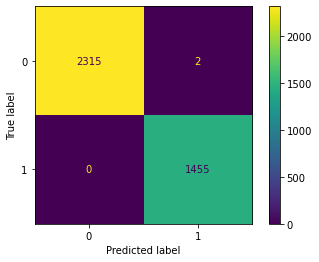

Confusion matrix on test data: 



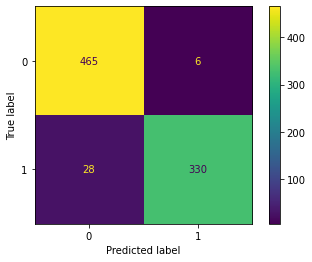

In [32]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print("Confusion matrix on train data: \n")
plot_confusion_matrix(Forest1,X_train1,y_train1)
plt.show()

print("Confusion matrix on test data: \n")
plot_confusion_matrix(Forest1,X_test1,y_test1)
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler()
X_prime2=pd.DataFrame(scaler2.fit_transform(X))
X_prime2.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222


In [34]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(X_prime2,y,test_size=0.18,random_state=42)
print(X_train.shape)
print(X_test.shape)

(3772, 57)
(829, 57)


In [35]:
from sklearn.ensemble import RandomForestClassifier
Forest2=RandomForestClassifier(random_state=0).fit(X_train2,np.asarray(y_train2).reshape(y_train2.shape[0],))
Forest2

RandomForestClassifier(random_state=0)

In [36]:
from sklearn.metrics import accuracy_score
train_pred=Forest2.predict(X_train2)
test_pred=Forest2.predict(X_test2)
print("Accuracy on train data: ",accuracy_score(y_train2,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test2,test_pred))

Accuracy on train data:  0.9994697773064687
Accuracy on test data:  0.9529553679131484


In [37]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC for train data: ",roc_auc_score(y_train2,train_pred))
print("ROC_AUC for test data: ",roc_auc_score(y_test2,test_pred))

ROC_AUC for train data:  0.9995684074233923
ROC_AUC for test data:  0.9482113416124021


Confusion matrix on train data: 



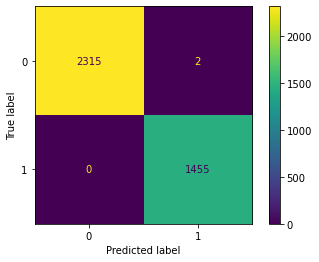

Confusion matrix on test data: 



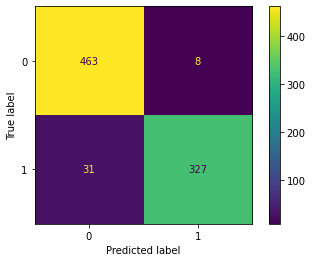

In [38]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print("Confusion matrix on train data: \n")
plot_confusion_matrix(Forest2,X_train2,y_train2)
plt.show()

print("Confusion matrix on test data: \n")
plot_confusion_matrix(Forest2,X_test2,y_test2)
plt.show()

|Feature selection|Test data accuracy|Test data false positive rate|Test data ROC_AUC|
|-----------------|------------------|-----------------------------|-----------------|
|Only 33 of the more relevant features were used|95.90%|1.79%|0.9545|
|All 57 features were used|95.30%|2.39%|0.9482|

#### Feature selection improved the model's performance. For this dataset and for the RandomForestClassifier model, the improvmenet is small. The actual impact of feature selection depends on the nature of the data and the model used. I had personally encountered situations in which a model's performance on test data was improved by almost 10% by carefully selecting the most relevant and most impactful features. 

Having good email misclassified as spam is very undesirable, especially when that email is an important one. We can increase the classification threshold to manually force a zero false positive rate. According to UCI's website, "If we insist on zero false positives in the training/testing set, 20-25% of the spam passed through the filter." **We can do better.**

I am going to adjust the threshold to force a zero false positive rate, using the mmodel with feature selection.

In [39]:
y_pred=pd.DataFrame(Forest1.predict_proba(X_test1)).rename(columns={0:"pred_0",1:"pred_1"})
y_pred.head()

,pred_0,pred_1
0,1.00,0.00
1,0.72,0.28
2,0.99,0.01
3,0.48,0.52
4,1.00,0.00


In [40]:
y_probs1=y_pred[["pred_1"]]

In [41]:
len(y_probs1[y_probs1["pred_1"]>=0.981])

136

In [42]:
y_pred["pred_0"]=np.where((y_pred.pred_0 >=0.981),1,y_pred.pred_0)
y_pred["pred_0"]=np.where((y_pred.pred_0 < 0.981),0,y_pred.pred_0)
y_pred["pred_1"]=np.where((y_pred.pred_1 >=0.981),1,y_pred.pred_1)
y_pred["pred_1"]=np.where((y_pred.pred_1 <0.981),0,y_pred.pred_1)

In [43]:
len11=len(y_pred[y_pred["pred_1"]==1])
print("The number of predicted positive cases: ",len11)

The number of predicted positive cases:  136


In [44]:
y_pred["pred_0"]=np.where((y_pred.pred_0 == y_pred.pred_1),1,y_pred.pred_0)

In [45]:
len00=len(y_pred[y_pred["pred_0"]==1])
print("The number of predicted negative cases: ",len00)

The number of predicted negative cases:  693


In [46]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown="ignore")
y_true=pd.DataFrame(enc.fit_transform(y_test1).toarray())

In [47]:
y_pred=enc.inverse_transform(y_pred)

In [53]:
from sklearn.metrics import confusion_matrix
print("Confusion_matrix after adjusting the threshold to force a zero false positive rate: \n",confusion_matrix(y_test1,y_pred))

Confusion_matrix after adjusting the threshold to force a zero false positive rate: 
 [[471   0]
 [222 136]]


In [52]:
print("True positive rate after adjusting the threshold to force a zero false positive rate: ",136/(222+136))

True positive rate after adjusting the threshold to force a zero false positive rate:  0.37988826815642457


In [49]:
print("Test data accuracy after forcing the false positive rate to  be 0: ",(136+471)/(136+471+222))

Test data accuracy after forcing the false positive rate to  be 0:  0.7322074788902292


There is a tradeoff between having an accurate model and making sure that no good emails get sent to the spam folder. After forcing false positive to be 0, accuracy decreased to 73.22% (it was 95.90% before the threshold was lower to obtain a zero false positive rate). The model detected 92.18% of the spam emails before increasing the threshold to force a zero false positive rate. After increasing the threshold, only 38% of the spam emails are caught by the filter.Still, **this is better than the 20-25% obtained by Hewlett-Packard in its "internal-only technical report" cited by UCI.**